In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
class_labels = [
    "Non Demented",
    "Very mild Dementia",
    "Mild Dementia",
    "Moderate Dementia"
]

In [3]:
model = load_model("models/ConvolutionalNeuralNetwork_model.h5", compile=False)

---

In [4]:
BASE_DIR = "user_input"

In [5]:
os.listdir(BASE_DIR)

['mild_dementia (1).jpg',
 'mild_dementia (10).jpg',
 'mild_dementia (2).jpg',
 'mild_dementia (3).jpg',
 'mild_dementia (4).jpg',
 'mild_dementia (5).jpg',
 'mild_dementia (6).jpg',
 'mild_dementia (7).jpg',
 'mild_dementia (8).jpg',
 'mild_dementia (9).jpg',
 'moderate_dementia (1).jpg',
 'moderate_dementia (10).jpg',
 'moderate_dementia (2).jpg',
 'moderate_dementia (3).jpg',
 'moderate_dementia (4).jpg',
 'moderate_dementia (5).jpg',
 'moderate_dementia (6).jpg',
 'moderate_dementia (7).jpg',
 'moderate_dementia (8).jpg',
 'moderate_dementia (9).jpg',
 'non_demented (1).jpg',
 'non_demented (10).jpg',
 'non_demented (2).jpg',
 'non_demented (3).jpg',
 'non_demented (4).jpg',
 'non_demented (5).jpg',
 'non_demented (6).jpg',
 'non_demented (7).jpg',
 'non_demented (8).jpg',
 'non_demented (9).jpg',
 'very_mild_dementia (1).jpg',
 'very_mild_dementia (10).jpg',
 'very_mild_dementia (2).jpg',
 'very_mild_dementia (3).jpg',
 'very_mild_dementia (4).jpg',
 'very_mild_dementia (5).jpg',


In [6]:
user_input = 'very_mild_dementia (10).jpg'

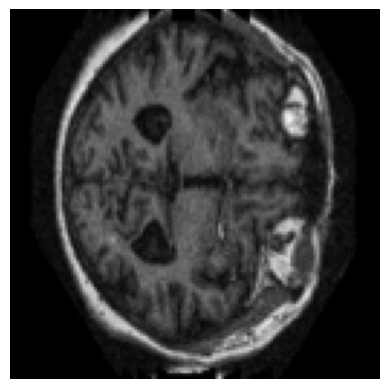

In [7]:
filepath = os.path.join(BASE_DIR, user_input)

image = Image.open(filepath)
resized_image = image.resize((128, 128))
plt.imshow(np.array(resized_image))
plt.axis("off")
plt.show()

In [8]:
array_image = np.array(resized_image)
normalized_image = array_image / 255.0
expanded_image = np.expand_dims(normalized_image, axis=0)

In [9]:
expanded_image.shape

(1, 128, 128, 3)

In [10]:
model_prediction = model.predict(expanded_image)[0]
max_prob_index = np.argmax(model_prediction)

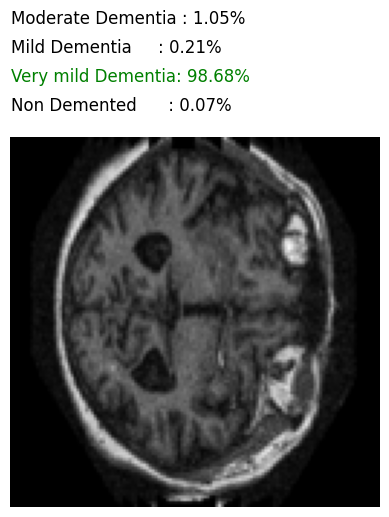

In [16]:
plt.imshow(array_image)
plt.axis("off")
max_label_length = max(len(label) for label in class_labels)
for i, (label, prob) in enumerate(zip(class_labels, model_prediction)):
    if i == max_prob_index:
        color = 'green'
    else:
        color = 'black'
    formatted_label = f"{label:<{max_label_length}}"
    plt.annotate(f"{formatted_label}: {prob*100:.2f}%", xy=(0, 0), xytext=(0, -(i*10)-10), color=color, fontsize=12)
plt.savefig("1.png")
plt.show()

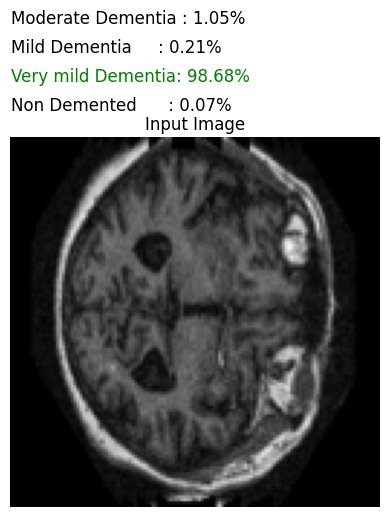

In [17]:
plt.imshow(array_image)
plt.axis("off")
max_label_length = max(len(label) for label in class_labels)
for i, (label, prob) in enumerate(zip(class_labels, model_prediction)):
    if i == max_prob_index:
        color = 'green'
    else:
        color = 'black'
    formatted_label = f"{label:<{max_label_length}}"
    plt.annotate(f"{formatted_label}: {prob*100:.2f}%", xy=(0, 0), xytext=(0, -(i*10)-10), color=color, fontsize=12)

# Set title
plt.title('Input Image')

# Save the plot with annotations
plt.savefig("1.png", bbox_inches='tight')

# Show the plot
plt.show()

---